### Student Information
Name: 邱一恩

Student ID: 113033628

GitHub ID: En90

Kaggle name: DM-2024 113033628

Kaggle private scoreboard snapshot:
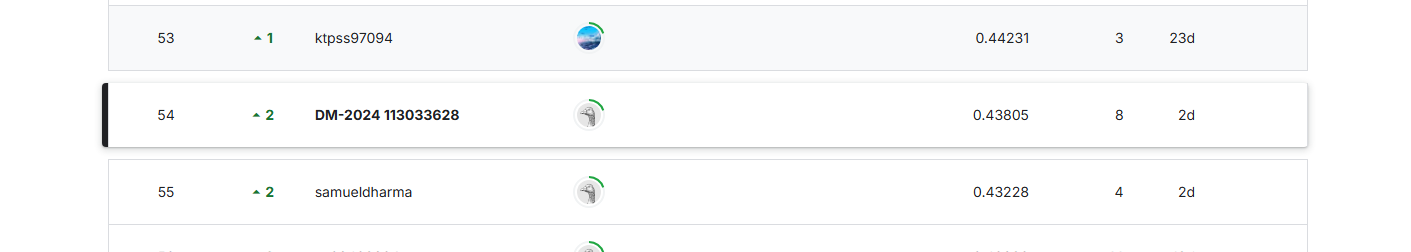

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

# Import Module

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import ollama
from tqdm import tqdm, tqdm_pandas
from tqdm import tqdm_notebook
import tensorflow_model_optimization as tfmot

# Load Data

In [3]:
tweets_DM = pd.read_json('dm-2024-isa-5810-lab-2-homework/tweets_DM.json', lines=True)
tweets_DM

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [4]:
data_identification = pd.read_csv('dm-2024-isa-5810-lab-2-homework/data_identification.csv')
data_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [5]:
emotion = pd.read_csv('dm-2024-isa-5810-lab-2-homework/emotion.csv')
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [6]:
sampleSubmission = pd.read_csv('dm-2024-isa-5810-lab-2-homework/sampleSubmission.csv')
sampleSubmission

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
...,...,...
411967,0x351857,surprise
411968,0x2c028e,surprise
411969,0x1f2430,surprise
411970,0x2be24e,surprise


# Check Data

In [7]:
tweets_DM['_index'].nunique()

1

In [8]:
tweets_DM['_type'].nunique()

1

In [9]:
first_row = tweets_DM.iloc[0]
first_row['_source']

{'tweet': {'hashtags': ['Snapchat'],
  'tweet_id': '0x376b20',
  'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}}

In [10]:
second_row = tweets_DM.iloc[1]
second_row['_source']['tweet']

{'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
 'tweet_id': '0x2d5350',
 'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}

# Preprocessing

In [11]:
processed_tweets_DM = tweets_DM.copy()

def get_id(row):
    return row['_source'].get('tweet').get('tweet_id')
processed_tweets_DM['tweet_id'] = processed_tweets_DM.apply(get_id, axis=1)
print("finish get id")

def get_hashtags(row):
    return row['_source'].get('tweet').get('hashtags')
processed_tweets_DM['hashtags'] = processed_tweets_DM.apply(get_hashtags, axis=1)
print("finish get hashtags")

def get_text(row):
    return row['_source'].get('tweet').get('text')
processed_tweets_DM['text'] = processed_tweets_DM.apply(get_text, axis=1)
print("finish get text")

processed_tweets_DM.drop(['_index', '_source', '_type'], axis=1, inplace=True)
processed_tweets_DM

finish get id
finish get hashtags
finish get text


,_score,_crawldate,tweet_id,hashtags,text
0,391,2015-05-23 11:42:47,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ..."
1,433,2016-01-28 04:52:09,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #..."
2,232,2017-12-25 04:39:20,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k..."
3,376,2016-01-24 23:53:05,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,2016-01-08 17:18:59,0x2de201,[],"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...
1867530,827,2015-05-12 12:51:52,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...
1867531,368,2017-10-02 17:54:04,0x29d0cb,[],I swear all this hard work gone pay off one da...
1867532,498,2016-10-10 11:04:32,0x2a6a4f,[],@Parcel2Go no card left when I wasn't in so I ...
1867533,840,2016-09-02 14:25:06,0x24faed,[],"Ah, corporate life, where you can date <LH> us..."


In [12]:
processed_tweets_DM = pd.merge(processed_tweets_DM, data_identification, on='tweet_id')
processed_tweets_DM['identification'].isna().sum()

0

In [13]:
train_df = processed_tweets_DM[processed_tweets_DM['identification']=="train"].drop(['identification'], axis=1)
test_df = processed_tweets_DM[processed_tweets_DM['identification']=="test"].drop(['identification'], axis=1)
train_df = pd.merge(train_df, emotion, on='tweet_id')

unique_categories = train_df['emotion'].unique()
category_to_number = {category: number for number, category in enumerate(unique_categories, start=1)}
train_df['numerical_emotion'] = train_df['emotion'].map(category_to_number)

In [14]:
train_df

,_score,_crawldate,tweet_id,hashtags,text,emotion,numerical_emotion
0,391,2015-05-23 11:42:47,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",anticipation,1
1,433,2016-01-28 04:52:09,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",sadness,2
2,376,2016-01-24 23:53:05,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,3
3,120,2015-06-11 04:44:05,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,joy,4
4,1021,2015-08-18 02:30:07,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,anticipation,1
...,...,...,...,...,...,...,...
1455558,94,2016-12-26 02:44:07,0x321566,"[NoWonder, Happy]",I'm SO HAPPY!!! #NoWonder the name of this sho...,joy,4
1455559,627,2015-04-01 08:14:56,0x38959e,[],In every circumtance I'd like to be thankful t...,joy,4
1455560,274,2016-11-17 23:46:22,0x2cbca6,[blessyou],there's currently two girls walking around the...,joy,4
1455561,840,2016-09-02 14:25:06,0x24faed,[],"Ah, corporate life, where you can date <LH> us...",joy,4


In [15]:
test_df

,_score,_crawldate,tweet_id,hashtags,text
2,232,2017-12-25 04:39:20,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k..."
4,989,2016-01-08 17:18:59,0x2de201,[],"""Trust is not the same as faith. A friend is s..."
9,66,2015-09-09 09:22:55,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...
30,104,2015-10-10 14:33:26,0x2939d5,"[GodsPlan, GodsWork]","God woke you up, now chase the day #GodsPlan #..."
33,310,2016-10-23 08:49:50,0x26289a,[],"In these tough times, who do YOU turn to as yo..."
...,...,...,...,...,...
1867525,602,2016-12-10 18:01:00,0x2913b4,[],"""For this is the message that ye heard from th..."
1867529,598,2015-01-04 14:40:55,0x2a980e,[],"""There is a lad here, which hath five barley l..."
1867530,827,2015-05-12 12:51:52,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...
1867531,368,2017-10-02 17:54:04,0x29d0cb,[],I swear all this hard work gone pay off one da...


In [16]:
train_df.emotion.unique()

array(['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust',
       'disgust', 'surprise'], dtype=object)

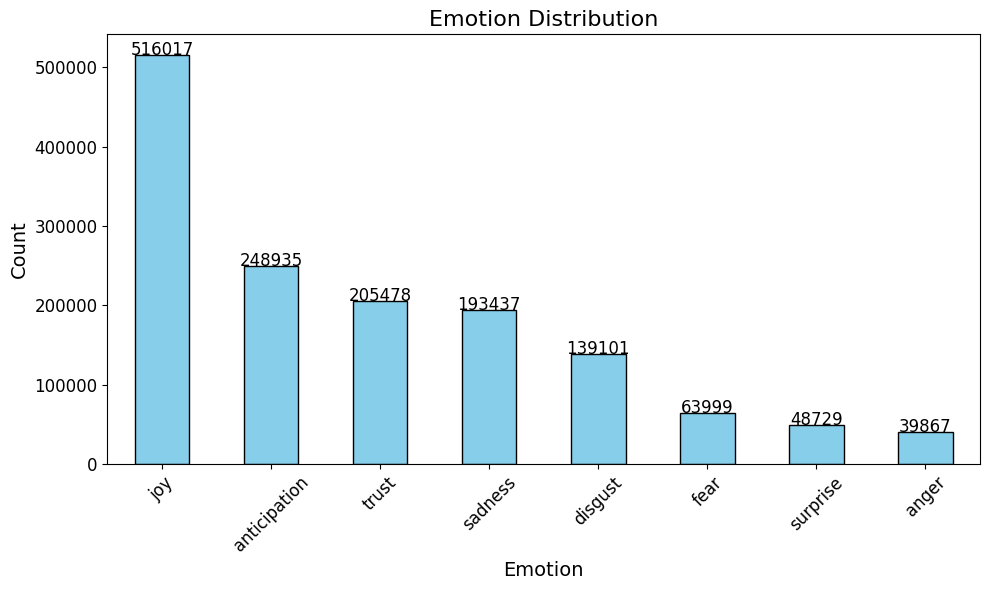

In [17]:
emotion_counts = train_df['emotion'].value_counts()

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Emotion Distribution', fontsize=16)

for idx, value in enumerate(emotion_counts):
    plt.text(idx, value + 0.1, str(value), ha='center', fontsize=12)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Training and Predicting

### 1. tfidf matrix & MultinomialNB

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=20000)  # Limit number of terms if needed
#tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_df['text'])
tfidf_matrix_train = tfidf_vectorizer.transform(train_df['text'])
terms = tfidf_vectorizer.get_feature_names_out()

category_mapping = dict(train_df[['numerical_emotion', 'emotion']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]
print(target_names)

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_train, train_df['numerical_emotion'], test_size=0.3, random_state=42)

['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust', 'disgust', 'surprise']


In [19]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_test_pred = nb_classifier.predict(X_test)
y_train_pred = nb_classifier.predict(X_train)

print("test: ")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, target_names=target_names, digits=4))

print("train: ")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred, target_names=target_names, digits=4))

test: 
Accuracy: 0.5195124911546274

Classification Report:
               precision    recall  f1-score   support

anticipation     0.6474    0.4537    0.5335     74942
     sadness     0.5180    0.4063    0.4554     58054
        fear     0.8369    0.2586    0.3951     19225
         joy     0.4794    0.8849    0.6219    154623
       anger     0.8273    0.1153    0.2023     11930
       trust     0.6412    0.1814    0.2828     61740
     disgust     0.5043    0.3179    0.3899     41475
    surprise     0.8472    0.1167    0.2051     14680

    accuracy                         0.5195    436669
   macro avg     0.6627    0.3418    0.3858    436669
weighted avg     0.5762    0.5195    0.4792    436669

train: 
Accuracy: 0.5327727908889442

Classification Report:
               precision    recall  f1-score   support

anticipation     0.6591    0.4655    0.5457    173993
     sadness     0.5428    0.4272    0.4781    135383
        fear     0.8487    0.2675    0.4068     44774
         

In [20]:
tfidf_matrix_test = tfidf_vectorizer.transform(test_df['text'])
y_pred = nb_classifier.predict(tfidf_matrix_test)

In [21]:
list_of_tuples = list(zip(y_pred, test_df['tweet_id'].values))
result = pd.DataFrame(list_of_tuples, columns=['emotion', 'id'])
result['emotion'] = result['emotion'].apply(lambda r: category_mapping.get(r))

In [22]:
result

,emotion,id
0,anticipation,0x28b412
1,anticipation,0x2de201
2,joy,0x218443
3,joy,0x2939d5
4,joy,0x26289a
...,...,...
411967,anticipation,0x2913b4
411968,anticipation,0x2a980e
411969,joy,0x316b80
411970,joy,0x29d0cb


In [23]:
result.to_csv('result.csv', index=False)

### 2. tfidf matrix & Decision Tree

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_features=20000)  # Limit number of terms if needed
#tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_df['text'])
tfidf_matrix_train = tfidf_vectorizer.transform(train_df['text'])
terms = tfidf_vectorizer.get_feature_names_out()

category_mapping = dict(train_df[['numerical_emotion', 'emotion']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]
print(target_names)

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_train, train_df['numerical_emotion'], test_size=0.3, random_state=42)

['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust', 'disgust', 'surprise']


In [25]:
DT_model = DecisionTreeClassifier(random_state=1, max_depth=100, min_samples_split=50, min_samples_leaf=25)
DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

print("test: ")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, target_names=target_names, digits=4))

print("train: ")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred, target_names=target_names, digits=4))

test: 
Accuracy: 0.4760516546858147

Classification Report:
               precision    recall  f1-score   support

anticipation     0.5555    0.4076    0.4702     74942
     sadness     0.4981    0.3087    0.3812     58054
        fear     0.7624    0.2390    0.3639     19225
         joy     0.4473    0.8342    0.5823    154623
       anger     0.7202    0.1437    0.2396     11930
       trust     0.5042    0.2306    0.3165     61740
     disgust     0.4239    0.1828    0.2554     41475
    surprise     0.8205    0.1563    0.2625     14680

    accuracy                         0.4761    436669
   macro avg     0.5915    0.3129    0.3590    436669
weighted avg     0.5123    0.4761    0.4380    436669

train: 
Accuracy: 0.5191089553967341

Classification Report:
               precision    recall  f1-score   support

anticipation     0.6246    0.4617    0.5310    173993
     sadness     0.5682    0.3549    0.4370    135383
        fear     0.7816    0.2548    0.3844     44774
         

In [26]:
tfidf_matrix_test = tfidf_vectorizer.transform(test_df['text'])
y_pred = DT_model.predict(tfidf_matrix_test)

In [27]:
list_of_tuples = list(zip(y_pred, test_df['tweet_id'].values))
result = pd.DataFrame(list_of_tuples, columns=['emotion', 'id'])
result['emotion'] = result['emotion'].apply(lambda r: category_mapping.get(r))

In [28]:
result

,emotion,id
0,trust,0x28b412
1,anticipation,0x2de201
2,joy,0x218443
3,joy,0x2939d5
4,joy,0x26289a
...,...,...
411967,joy,0x2913b4
411968,joy,0x2a980e
411969,anticipation,0x316b80
411970,joy,0x29d0cb


In [29]:
result.to_csv('result.csv', index=False)

### 3. PAMI

In [ ]:
categories = train_df['emotion'].unique()
category_dfs = {}

for category in categories:
    category_dfs[category] = train_df[train_df['emotion'] == category].copy()

In [ ]:
def create_term_document_df(df):
    count_vect = CountVectorizer()
    count_vect.fit(df['text'])
    term_document = count_vect.transform(df['text'])
    words = count_vect.get_feature_names_out()
    # term_document_df = pd.DataFrame(term_document.todense(), columns=words)
    term_document_df = pd.DataFrame.sparse.from_spmatrix(term_document, columns=words)
    return term_document_df

term_document_dicts = {} 

for category in categories:
    term_document_dicts[category] = create_term_document_df(category_dfs[category])

In [ ]:
temp_pd_out_bottom = pd.DataFrame()
temp_pd_out_top = pd.DataFrame()

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, category_name, temp_pd_bottom, temp_pd_top, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    print(f'Bottom percentage: {sorted_words.head(bottom_n)}') # print which words correspond to the bottom percentage we filterd
    print(f'Top percentage: {sorted_words.tail(top_n)}') # print which words correspond to the top percentage we filterd

    if (temp_pd_top.empty):
        temp_pd_top = pd.DataFrame(sorted_words.tail(20).index.array, columns=[category_name])
    else:
        right = pd.DataFrame(sorted_words.tail(20).index.array, columns=[category_name])
        temp_pd_top = pd.merge(temp_pd_top, right, left_index=True, right_index=True)

    if (temp_pd_bottom.empty):
        temp_pd_bottom = pd.DataFrame(sorted_words.head(20).index.array, columns=[category_name])
    else:
        right = pd.DataFrame(sorted_words.head(20).index.array, columns=[category_name])
        temp_pd_bottom = pd.merge(temp_pd_bottom, right, left_index=True, right_index=True)
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove), temp_pd_bottom, temp_pd_top
    

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    print(f'For category {category} we filter the following words:')
    filtered_term_document_dfs[category], temp_pd_out_bottom, temp_pd_out_top = filter_top_bottom_words_by_sum(term_document_dfs[category], category, temp_pd_out_bottom, temp_pd_out_top)
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]

For category anticipation we filter the following words:


AttributeError: 'matrix' object has no attribute 'sort_values'

In [ ]:
from PAMI.extras.DF2DB import DenseFormatDF as db

for category, term_document in term_document_dicts.items():
    category_save_name = category.replace('.', '_')

    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document)
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_save_name}.csv', '>=', 1)
    #使用頻率大於等於1的(有使用的)都會被加入 transaction 中

UnicodeEncodeError: 'cp950' codec can't encode character '\xe9' in position 7: illegal multibyte sequence

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### 4. word2vec & tfidf weighted sum & KNeighborsClassifier

In [ ]:
#min_size = train_df['emotion'].value_counts().min()
min_size = 35000
balanced_data = []
for emotion, group in train_df.groupby('emotion'):
    balanced_data.append(group.sample(n=min_size, random_state=42))

balanced_df = pd.concat(balanced_data)
print(balanced_df['emotion'].value_counts())

emotion
anger           35000
anticipation    35000
disgust         35000
fear            35000
joy             35000
sadness         35000
surprise        35000
trust           35000
Name: count, dtype: int64


In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=30000)
tfidf_vectorizer.fit(balanced_df['text'])
terms = tfidf_vectorizer.get_feature_names_out()

In [ ]:
def text_to_weighted_w2v(text, model, vectorizer):
    tfidf_weights = vectorizer.transform([text])  # 計算 TF-IDF 權重
    feature_names = vectorizer.get_feature_names_out()
    
    words = text.split()
    weighted_vector = np.zeros(model.vector_size)
    total_weight = 0.0
    
    for word in words:
        if word in model and word in feature_names:
            idx = vectorizer.vocabulary_.get(word)
            weight = tfidf_weights[0, idx]
            weighted_vector += model[word] * weight
            total_weight += weight
    
    if total_weight > 0:
        weighted_vector /= total_weight
    
    return weighted_vector

tqdm_notebook().pandas()

balanced_df['w2v_vector'] = balanced_df['text'].progress_apply(lambda x: text_to_weighted_w2v(x, w2v_google_model, tfidf_vectorizer))
print(balanced_df['w2v_vector'].head())

C:\Users\USER\AppData\Local\Temp\ipykernel_21640\3674006329.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

  0%|          | 0/240000 [00:00<?, ?it/s]

1294011    [0.02650919992970869, 0.03849343222123638, 0.0...
411063     [0.13267740995570743, -0.03142471153237727, 0....
1240310    [0.01099047261253711, 0.018575470193708057, 0....
479230     [0.08731845322088568, 0.18283185314784675, -0....
47516      [0.07896231952208625, 0.03677148916708311, 0.0...
Name: w2v_vector, dtype: object


In [ ]:
balanced_df
balanced_df.to_pickle("balanced_df.pkl") 

In [ ]:
balanced_df

,_score,_crawldate,tweet_id,hashtags,text,emotion,numerical_emotion,w2v_vector
1294011,462,2016-08-26 15:39:21,0x249df0,[],@OptimumHelp when will we have service back fo...,anger,5,"[0.02650919992970869, 0.03849343222123638, 0.0..."
411063,637,2017-02-09 13:17:04,0x346447,[],What gives @GoldenKnights ? Game's not on @ATT...,anger,5,"[0.13267740995570743, -0.03142471153237727, 0...."
1240310,280,2016-08-10 22:10:36,0x344f34,[EmbraceDebate],I think @hen_ease killed the Mt. Rushmore toda...,anger,5,"[0.01099047261253711, 0.018575470193708057, 0...."
479230,806,2016-11-01 06:48:41,0x1f4b1b,[],Thousands of blithering anamorphic pirates ! <LH>,anger,5,"[0.08731845322088568, 0.18283185314784675, -0...."
47516,747,2016-12-07 15:38:45,0x330516,[],@Friday13thGame. When are the connection issue...,anger,5,"[0.07896231952208625, 0.03677148916708311, 0.0..."
...,...,...,...,...,...,...,...,...
671718,742,2015-06-17 04:55:35,0x2bdc6a,[],Family is actually the best gift life gives yo...,trust,6,"[0.07474582016003223, -0.04359726143788164, 0...."
69473,801,2016-10-04 12:43:27,0x298e90,[],Happy Thanksgiving from us here at Headmaster!...,trust,6,"[0.0189210606935624, 0.006160882249910753, 0.0..."
168893,129,2015-10-19 10:09:36,0x2d4587,[SanJose],Take the exam & turn into an ensured certified...,trust,6,"[-0.026589568283050376, -0.0026412656923471864..."
218146,898,2016-11-25 22:09:59,0x2df232,[],"Your justice, O God, extends to the skies abov...",trust,6,"[-0.024916633783051215, 0.12962183188986004, -..."


In [ ]:
train_df_70, test_df_30 = train_test_split(balanced_df, test_size=0.25, random_state=42)

X_train = train_df_70['w2v_vector'].tolist()
y_train = train_df_70['emotion']

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

X_test = test_df_30['w2v_vector'].tolist()
y_test = test_df_30['emotion']

y_pred_test = knn.predict(X_test)
print("test:")
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_test)}')
print(classification_report(y_true=y_test, y_pred=y_pred_test))

y_pred_train = knn.predict(X_train)
print("train:")
print(f'KNN Accuracy: {accuracy_score(y_train, y_pred_train)}')
print(classification_report(y_true=y_train, y_pred=y_pred_train))

test:
KNN Accuracy: 0.27686666666666665
              precision    recall  f1-score   support

       anger       0.26      0.38      0.31      7349
anticipation       0.32      0.44      0.37      7529
     disgust       0.25      0.23      0.24      7464
        fear       0.32      0.28      0.30      7552
         joy       0.23      0.33      0.27      7414
     sadness       0.24      0.16      0.20      7559
    surprise       0.27      0.16      0.20      7639
       trust       0.33      0.24      0.28      7494

    accuracy                           0.28     60000
   macro avg       0.28      0.28      0.27     60000
weighted avg       0.28      0.28      0.27     60000

train:
KNN Accuracy: 0.34182222222222225
              precision    recall  f1-score   support

       anger       0.32      0.46      0.38     22651
anticipation       0.36      0.50      0.42     22471
     disgust       0.33      0.30      0.31     22536
        fear       0.38      0.34      0.36     224

In [ ]:
test_df_knn = test_df.copy()
tqdm_notebook().pandas()
test_df_knn['w2v_vector'] = test_df_knn['text'].progress_apply(lambda x: text_to_weighted_w2v(x, w2v_google_model, tfidf_vectorizer))
test_df_knn_list = test_df_knn['w2v_vector'].tolist()

pred_result = knn.predict(test_df_knn_list)
list_of_tuples = list(zip(pred_result, test_df['tweet_id'].values))
result = pd.DataFrame(list_of_tuples, columns=['emotion', 'id'])
result

### 5. tfidf matrix & Deep Neural Network

In [ ]:
#min_size = train_df['emotion'].value_counts().min()
#min_size = 35000
min_size = 250000
balanced_data = []
for emotion, group in train_df.groupby('emotion'):
    if emotion=='joy':
        balanced_data.append(group.sample(n=min_size, random_state=42))
    else:
        balanced_data.append(group)

balanced_df = pd.concat(balanced_data)
print(balanced_df['emotion'].value_counts())
print(balanced_df['emotion'].value_counts().sum())

emotion
joy             250000
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: count, dtype: int64
1189546


In [ ]:
train_df = balanced_df

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=30000)
tfidf_vectorizer.fit(train_df['text'])
terms = tfidf_vectorizer.get_feature_names_out()

tfidf_matrix_train = tfidf_vectorizer.transform(train_df['text'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_train, train_df['emotion'], test_size=0.3, random_state=42)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

y_train.shape:  (1018894, 8)
y_test.shape:  (436669, 8)


In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  30000
output_shape:  8


In [ ]:
# input layer
model_input = Input(shape=(input_shape, ))  # 30000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=16)(X)  # 128
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=12)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 8
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 30000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 16)                  │         480,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_20 (ReLU)                      │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_21 (ReLU)                      │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_9 (Softmax)                  │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 480,324 (1.83 MB)

 Trainable params: 480,324 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# input layer
model_input = Input(shape=(input_shape, ))  # 30000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=128)(X)  # 128
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=128)(H1)  # 128
H2 = ReLU()(H1_W2)

# 3nd hidden layer
H2_W3 = Dense(units=64)(H2)  # 64
H3 = ReLU()(H2_W3)

# output layer
H3_W4 = Dense(units=output_shape)(H3)  # 8
H4 = Softmax()(H3_W4)

model_output = H4

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 30000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │       3,840,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_15 (ReLU)                      │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_16 (ReLU)                      │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_17 (ReLU)                      │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_7 (Softmax)                  │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,865,416 (14.75 MB)

 Trainable params: 3,865,416 (14.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
csv_logger = CSVLogger('logs/training_log.csv')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='models/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

epochs = 25
batch_size = 256
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger, early_stopping, model_checkpoint],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\USER\data\python_virtual_env\DM2024\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_60']. Received: the structure of inputs=*
  warnings.warn(


3981/3981 ━━━━━━━━━━━━━━━━━━━━ 69s 17ms/step - accuracy: 0.4923 - loss: 1.4254 - val_accuracy: 0.5602 - val_loss: 1.2280
Epoch 2/25
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 66s 17ms/step - accuracy: 0.5824 - loss: 1.1603 - val_accuracy: 0.5634 - val_loss: 1.2166
Epoch 3/25
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 66s 17ms/step - accuracy: 0.5990 - loss: 1.1070 - val_accuracy: 0.5654 - val_loss: 1.2154
Epoch 4/25
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 66s 16ms/step - accuracy: 0.6114 - loss: 1.0694 - val_accuracy: 0.5650 - val_loss: 1.2253
Epoch 5/25
3981/3981 ━━━━━━━━━━━━━━━━━━━━ 66s 17ms/step - accuracy: 0.6228 - loss: 1.0380 - val_accuracy: 0.5644 - val_loss: 1.2374
Epoch 6/25
2746/3981 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.6362 - loss: 1.0015

KeyboardInterrupt: 

In [ ]:
model.load_weights('models/best_model.keras')
y_test_pred = model.predict(X_test, batch_size=128)
test_pred_result = label_decode(label_encoder, y_test_pred)
test_truth = label_decode(label_encoder, y_test)
y_train_pred = model.predict(X_train, batch_size=128)
train_pred_result = label_decode(label_encoder, y_train_pred)
train_truth = label_decode(label_encoder, y_train)
target_names = label_encoder.classes_

print("test: ")
print("Accuracy:", accuracy_score(test_truth, test_pred_result))
print("\nClassification Report:\n", classification_report(test_truth, test_pred_result, target_names=target_names, digits=4))

print("train: ")
print("Accuracy:", accuracy_score(train_truth, train_pred_result))
print("\nClassification Report:\n", classification_report(train_truth, train_pred_result, target_names=target_names, digits=4))

3412/3412 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 63s 8ms/step
test: 
Accuracy: 0.5743297554898562

Classification Report:
               precision    recall  f1-score   support

       anger     0.5455    0.2630    0.3549     11930
anticipation     0.6592    0.5672    0.6097     74942
     disgust     0.4458    0.4636    0.4545     41475
        fear     0.7033    0.4068    0.5154     19225
         joy     0.5834    0.7959    0.6733    154623
     sadness     0.5029    0.5058    0.5043     58054
    surprise     0.6198    0.2507    0.3570     14680
       trust     0.5959    0.3563    0.4459     61740

    accuracy                         0.5743    436669
   macro avg     0.5820    0.4511    0.4894    436669
weighted avg     0.5799    0.5743    0.5607    436669

train: 
Accuracy: 0.6802189432855625

Classification Report:
               precision    recall  f1-score   support

       anger     0.7683    0.3984    0.5247     27937
anticipation     0.7686    0.

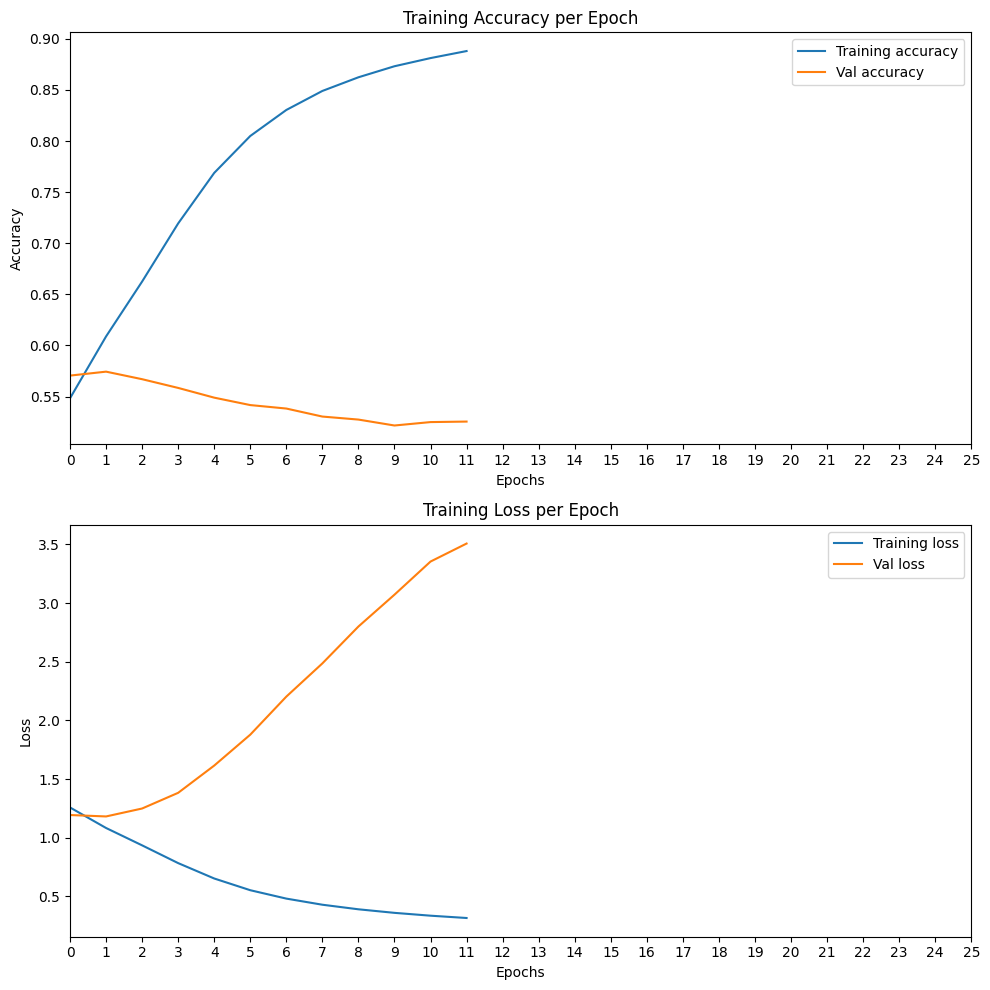

In [ ]:
# pred_result = model.predict(X_test, batch_size=128)
# pred_result = label_decode(label_encoder, pred_result)
# print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(training_log['epoch'], training_log['accuracy'], label='Training accuracy')
axs[0].plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training Accuracy per Epoch')
axs[0].legend()
axs[0].grid(False)
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].set_xlim((0, 25))
axs[1].plot(training_log['epoch'], training_log['loss'], label='Training loss')
axs[1].plot(training_log['epoch'], training_log['val_loss'], label='Val loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training Loss per Epoch')
axs[1].legend()
axs[1].grid(False)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].set_xlim((0, 25))
plt.tight_layout()
plt.show()

In [ ]:
#model.load_weights('models/best_model.keras')
X_predict = tfidf_vectorizer.transform(test_df['text'])
pred_result = model.predict(X_predict, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

list_of_tuples = list(zip(pred_result, test_df['tweet_id'].values))
result = pd.DataFrame(list_of_tuples, columns=['emotion', 'id'])
result

3219/3219 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step


,emotion,id
0,anticipation,0x28b412
1,anticipation,0x2de201
2,joy,0x218443
3,joy,0x2939d5
4,trust,0x26289a
...,...,...
411967,joy,0x2913b4
411968,anticipation,0x2a980e
411969,sadness,0x316b80
411970,joy,0x29d0cb


In [ ]:
result.to_csv('result.csv', index=False)

### 6. LLM Embeddings & KNeighborsClassifier

In [ ]:
min_size = 35000
balanced_data = []
for emotion, group in train_df.groupby('emotion'):
    balanced_data.append(group.sample(n=min_size, random_state=42))

balanced_df = pd.concat(balanced_data)
print(balanced_df['emotion'].value_counts())

In [ ]:
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2:1b',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [ ]:
#train_df_70, test_df_30 = train_test_split(train_df, test_size=0.3, random_state=42)
train_df_70, test_df_30 = train_test_split(balanced_df, test_size=0.25, random_state=42)

tqdm_notebook().pandas()
column_name = 'text'
# Apply the function to the specified column and store the result in a new column 'embeddings'
train_df_70['embeddings'] = train_df_70.progress_apply(lambda row: generate_embeddings(row, column_name), axis=1)
train_df_70.to_parquet('llm_embedding/train_df_70.parquet.gzip', compression='gzip')

C:\Users\USER\AppData\Local\Temp\ipykernel_21640\265412493.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

  0%|          | 0/210000 [00:00<?, ?it/s]

In [ ]:
test_df_30['embeddings'] = test_df_30.progress_apply(lambda row: generate_embeddings(row, column_name), axis=1)
test_df_30.to_parquet('llm_embedding/test_df_30.parquet.gzip', compression='gzip')

  0%|          | 0/70000 [00:00<?, ?it/s]

In [ ]:
# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = train_df_70["embeddings"].tolist()
y_train = train_df_70['emotion']

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

X_test = test_df_30["embeddings"].tolist()
y_test = test_df_30['emotion']

y_pred_test = knn.predict(X_test)
print("test:")
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_test)}')
print(classification_report(y_true=y_test, y_pred=y_pred_test))

y_pred_train = knn.predict(X_train)
print("train:")
print(f'KNN Accuracy: {accuracy_score(y_train, y_pred_train)}')
print(classification_report(y_true=y_train, y_pred=y_pred_train))

test:
KNN Accuracy: 0.4068
              precision    recall  f1-score   support

       anger       0.36      0.56      0.44      8723
anticipation       0.49      0.51      0.50      8726
     disgust       0.34      0.35      0.34      8677
        fear       0.42      0.53      0.46      8679
         joy       0.41      0.37      0.39      8698
     sadness       0.39      0.34      0.36      8808
    surprise       0.44      0.25      0.32      8806
       trust       0.45      0.35      0.39      8883

    accuracy                           0.41     70000
   macro avg       0.41      0.41      0.40     70000
weighted avg       0.41      0.41      0.40     70000

train:
KNN Accuracy: 0.4596952380952381
              precision    recall  f1-score   support

       anger       0.41      0.61      0.49     26277
anticipation       0.54      0.56      0.55     26274
     disgust       0.41      0.42      0.41     26323
        fear       0.46      0.56      0.50     26321
         jo

In [ ]:
with open('knn_model_n10.pkl', 'wb') as f:
    pickle.dump(knn, f)
print("Model saved as knn_model.pkl")

Model saved as knn_model.pkl


In [ ]:
tqdm_notebook().pandas()
test_df_knn = test_df.copy()
column_name = 'text'
test_df_knn['embeddings'] = test_df_knn.progress_apply(lambda row: generate_embeddings(row, column_name), axis=1)
test_df_knn_list = test_df_knn["embeddings"].tolist()

C:\Users\USER\AppData\Local\Temp\ipykernel_22380\3339545548.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


0it [00:00, ?it/s]

  0%|          | 0/411972 [00:00<?, ?it/s]

In [ ]:
with open('knn_model_n10.pkl', 'rb') as f:
    knn = pickle.load(f)
print("Model loaded")

Model loaded


In [ ]:
pred_result = knn.predict(test_df_knn_list)
list_of_tuples = list(zip(pred_result, test_df['tweet_id'].values))
result = pd.DataFrame(list_of_tuples, columns=['emotion', 'id'])
result

,emotion,id
0,anticipation,0x28b412
1,joy,0x2de201
2,trust,0x218443
3,anticipation,0x2939d5
4,sadness,0x26289a
...,...,...
411967,anticipation,0x2913b4
411968,anticipation,0x2a980e
411969,anger,0x316b80
411970,fear,0x29d0cb


In [ ]:
result.to_csv('result.csv', index=False)